## Formulation


### State Space


State - A 1D list of 4 elements [F, C, G, W] where each is 0 (left bank) or 1 (right bank).

F = farmer

W = wolf

G = goat

C = cabbage
So initial = (0,0,0,0) and goal = (1,1,1,1).

### Failure States
 Which are not allowed, where there is chance for any one to be eaten


In [ ]:
def fail_state(curr):
  if(curr[1]==curr[2] and curr[0]!=curr[1]):
    return True
  elif(curr[2]==curr[3] and curr[0]!=curr[2]):
    return True
  else:
    return False

### Next Possible set of moves from a given state

In [ ]:
def next_possible_move(curr):
    next_state_set = []

    # 1. Farmer moves alone
    state = curr.copy()
    state = swap(state, 0)    # move farmer
    if not fail_state(state):
        next_state_set.append(state)

    # 2. Farmer takes one passenger (wolf/goat/cabbage)
    for i in range(1, 4):  # try wolf, goat, cabbage
        if curr[i] == curr[0]:   # same side as farmer
            state = curr.copy()
            state = swap(state, 0)   # move farmer
            state = swap(state, i)   # move item with farmer
            if not fail_state(state):
                next_state_set.append(state)

    return next_state_set


### Swap or Toggle Sides
This means on travelling across the river, the individual/object has changed sides

In [ ]:
def swap(curr, i):
  if curr[i]==0:
    curr[i]=1
  else:
    curr[i]=0
  return curr

In [ ]:
#swap([1,0,1],0)
next_possible_move([0,1,0,1])

[[1, 1, 0, 1], [1, 1, 1, 1]]

### Mapping state with indices
This is done because while maintaining the visited set, a state ( a list/tuple ) cannot be added to the set, since in python list is not hashable. Hence we label a state by an index, which is the decimal value of the list ( in the binary representation ).

In [ ]:
mapState=[]
ind=0
for i in range(0,2):
  for j in range(0,2):
    for k in range(0,2):
      for m in range(0,2):
        mapState.append([ind,[i,j,k,m]])
        ind=ind+1
# for ind,stateind in mapState:
#   print(ind,stateind)

In [ ]:
def index(state):
  for ind,stateind in mapState:
    if state==stateind:
      return ind

## Algorithms

### DFS

In [ ]:
def dfs(state, goal, visited, path):
    # Already visited → stop
    if index(state) in visited:
        return None

    # If state is invalid → stop
    if fail_state(state):
        return None

    # Add current state to path
    path = path + [state]   # make a copy for each branch
    visited.add(index(state))

    # Goal reached
    if state == goal:
        return path

    # Explore neighbors
    for neighbour in next_possible_move(state):
        if index(neighbour) not in visited:
            result = dfs(neighbour, goal, visited, path)
            if result:     # found a solution
                return result

    # No solution from this branch
    return None


#### Run DFS

In [ ]:

# index([1,1,0,1])
visited=set()
path=[]
path=dfs([0,0,0,0],[1,1,1,1],visited,path)
print("Solution path:")
for step in path:
    print(step)

Solution path:
[0, 0, 0, 0]
[1, 0, 1, 0]
[0, 0, 1, 0]
[1, 1, 1, 0]
[0, 1, 0, 0]
[1, 1, 0, 1]
[0, 1, 0, 1]
[1, 1, 1, 1]


### BFS

In [ ]:
from collections import deque

def bfs(start, goal,visited, path):
    path.append(start)
    queue = deque([(start, path)])   # (state, path)

    while queue:
        state, path = queue.popleft()
        key = index(state)  # unique hashable representation

        if key in visited:
            continue
        visited.add(key)

        # Goal check
        if state == goal:
            return path

        # Expand neighbors
        for neighbor in next_possible_move(state):
            if index(neighbor) not in visited:
                queue.append((neighbor, path + [neighbor]))

    return None


In [ ]:
start = [0,0,0,0]   # farmer, wolf, goat, cabbage on left
goal  = [1,1,1,1]   # all on right
visited=set()
path=[]
solution = bfs(start, goal,visited, path)
print("Solution path:")
for step in solution:
    print(step)


Solution path:
[0, 0, 0, 0]
[1, 0, 1, 0]
[0, 0, 1, 0]
[1, 1, 1, 0]
[0, 1, 0, 0]
[1, 1, 0, 1]
[0, 1, 0, 1]
[1, 1, 1, 1]


### DLS

In [ ]:
def dls(state, goal, visited, path, depth, limit):
    # cutoff
    if depth > limit:
        return None

    key = index(state)
    if key in visited:
        return None

    visited.add(key)
    path.append(state)

    # goal check
    if state == goal:
        return path.copy()

    # expand neighbors
    for neighbour in next_possible_move(state):
        result = dls(neighbour, goal, visited, path, depth+1,limit )
        if result is not None:
            return result

    # backtrack
    path.pop()
    return None

In [ ]:
start = [0,0,0,0]   # farmer, wolf, goat, cabbage on left
goal  = [1,1,1,1]   # all on right
limit = 6

visited = set()
path = []

solution = dls(start, goal, visited, path, 0, limit)
if solution:
  print("Solution path:")
  for step in solution:
      print(step)
else:
  print("No path found with this depth")


No path found with this depth


### IDS

In [ ]:
def dls_ids(state, goal,visited, path, limit, depth):
    # cutoff
    if depth > limit:
        return None

    key = index(state)
    if key in visited:
        return None

    visited.add(key)
    path.append(state)

    # goal check
    if state == goal:
        return path.copy()

    # expand neighbors
    for neighbour in next_possible_move(state):
        result = dls_ids(neighbour, goal, visited, path, limit, depth+1)
        if result is not None:
            return result

    # backtrack
    path.pop()
    return None


In [ ]:
def ids(start, goal,visited, path, max_depth=16):
    for j in range(1, max_depth+1):
        visited = set()
        path=[]
        solution = dls_ids(start, goal,visited, path, j, 0)
        if solution:
            #print(f"Reached {goal} from {start} at depth limit = {j}")
            return j,solution
    return max_depth,None

In [ ]:
start = [0,0,0,0]   # farmer, wolf, goat, cabbage on left
goal  = [1,1,1,1]   # all on right
visited = set()
path=[]
depth,solution=ids(start, goal,visited, path)
print(depth)
if solution:
  for step in solution:
    print(step)

7
[0, 0, 0, 0]
[1, 0, 1, 0]
[0, 0, 1, 0]
[1, 1, 1, 0]
[0, 1, 0, 0]
[1, 1, 0, 1]
[0, 1, 0, 1]
[1, 1, 1, 1]


### UCS

In [ ]:
import heapq

def ucs(start, goal,visited,path):
    # Priority queue holds tuples (cost_so_far, node, path_so_far)
    path.append(start)
    pq = [(0, start,path)]
    visited = set()

    while pq:
        cost, state, path = heapq.heappop(pq)

        if index(state) in visited:
            continue
        visited.add(index(state))

        if state == goal:
            return cost, path  # Return both cost and path

        for neighbour in next_possible_move(state):
            if index(neighbour) not in visited:
                w=step_cost1(state,neighbour,goal)
                heapq.heappush(pq, (cost + w, neighbour, path + [neighbour]))

    return float('inf'), []  # if no path exists


#### Cost function - Difference of current state with goal

In [ ]:
def step_cost1(curr, next_state, goal):
    # Cost = number of different bits between next_state and goal
    sum=0
    for i in range(len(goal)):
      if next_state[i] != goal[i]:
        sum=sum+1
    return sum


#### Cost function - Custom
Difficult to carry wolf 4 <br>
Less difficult to carry goat 3 <br>
Least Difficult to carry cabbage 2 <br>
Easiest if farmer is alone 1 <br>

In [ ]:
def step_cost2(curr, next_state,goal):
    # Identify which positions differ
    moved = [i for i in range(4) if curr[i] != next_state[i]]

    # If only farmer moved
    if moved == [0]:
        return 1  # farmer alone

    # If farmer + someone else moved
    if len(moved) == 2 and 0 in moved:
        passenger = [i for i in moved if i != 0][0]
        if passenger == 1:  # cabbage
            return 2
        elif passenger == 2:  # goat
            return 3
        elif passenger == 3:  # wolf
            return 4

    # Should never reach here if moves are valid
    raise ValueError(f"Invalid move from {curr} to {next_state}")


In [ ]:
curr = [0,0,0,0]   # all on left bank
next_state = [1,0,0,0]  # farmer alone crosses
print(step_cost2(curr,next_state,[1,1,1,1]))  # 1

next_state = [1,0,1,0]  # farmer + goat cross
print(step_cost2(curr,next_state,[1,1,1,1]))  # 3


1
3


In [ ]:
start = [0,0,0,0]   # farmer, wolf, goat, cabbage on left
goal  = [1,1,1,1]   # all on right
visited = set()
path=[]
cost, path=ucs(start, goal,visited, path)
print("Cost is",cost)
print("Path is ")
for step in path:
  print(step)

Cost is 12
Path is 
[0, 0, 0, 0]
[1, 0, 1, 0]
[0, 0, 1, 0]
[1, 0, 1, 1]
[0, 0, 0, 1]
[1, 1, 0, 1]
[0, 1, 0, 1]
[1, 1, 1, 1]


### ILS

In [ ]:
import heapq
def ils(start,goal,path,visited):

  limit=0
  while True:
    next_limit=float('inf')
    path=[start]
    visited = set()
    pq=[(0,start,path)]

    while pq:
      cost,state,path=heapq.heappop(pq)
      if index(state) in visited:
        continue

      if state == goal:
        #print("Reached goal with cost limit =",limit)
        return cost,path

      if cost > limit:
        # cutoff, but track next smallest cutoff
        next_limit = min(next_limit, cost)
        continue

      visited.add(index(state))

      for neighbour in next_possible_move(state):
        if index(neighbour) not in visited:
          w=step_cost1(state,neighbour,goal)
          heapq.heappush(pq,(cost+w,neighbour,path+[neighbour]))

    if next_limit == float('inf'):
      return None,[]  # no path exists
    limit = next_limit
    # print("Increasing cost limit to",limit)

In [ ]:
start = [0,0,0,0]   # farmer, wolf, goat, cabbage on left
goal  = [1,1,1,1]   # all on right
visited = set()
path=[]
cost, path=ils(start, goal,visited, path)
print("Cost is",cost)
print("Path is ")
for step in path:
  print(step)

Cost is 12
Path is 
[0, 0, 0, 0]
[1, 0, 1, 0]
[0, 0, 1, 0]
[1, 0, 1, 1]
[0, 0, 0, 1]
[1, 1, 0, 1]
[0, 1, 0, 1]
[1, 1, 1, 1]


## Main

#### Algorithm Dictionary
Algorithms mapped by indices for easy method invocation

In [ ]:
# --- Mapping options to functions ---
algo_dict = {
    0: bfs,
    1: dfs,
    2: dls,
    3: ids,
    4: ucs,
    5: ils
}

#### Time - Memory Utility

In [ ]:
import time, tracemalloc

# --- utility to measure time + memory ---
def run_with_stats(func, *args, **kwargs):
    tracemalloc.start()
    t1 = time.perf_counter()
    result = func(*args, **kwargs)

    t2 = time.perf_counter()
    current, peak = tracemalloc.get_traced_memory()
    tracemalloc.stop()

    stats = {
        "name" : func.__name__,
        "time": t2 - t1,
        "peak_memory": peak,
        "result": result
    }
    return stats


#### Driver loop

In [ ]:
# --- Driver loop ---
def run_from_file(filename,filedes):

    memory_usage=[0 for i in range(0,6)]
    time_usage=[0 for i in range(0,6)]
    no_of_testcase=[0 for i in range(0,6)]
    dep=[[],[]]
    mem=[[],[]]
    tim=[[],[]]

    with open(filename, "r") as f:
        lines = f.readlines()
    with open(filedes, "w") as f:
        f.write("")
    for line in lines:
        line = line.strip()
        if not line or line.startswith("#"):  # skip empty/comment lines
            continue

        # Example line format: algo_id start goal param
        # e.g. 2 [0,0,0,0] [1,1,1,1] 10
        parts = line.split()
        algo_id = int(parts[0])
        start = eval(parts[1])    # be careful: expects Python list syntax
        goal  = eval(parts[2])
        param = int(parts[3]) if len(parts) > 3 else None

        algo = algo_dict[algo_id]
        print(f"\nRunning Algo {algo_id} with start={start}, goal={goal}, param={param}")
        visited=set()
        path=[]
        if algo_id == 2:   # DLS requires depth limit
            stats = run_with_stats(algo, start, goal, visited, path, 0, param)
            updateAveragefordepth(2,  param,  stats, dep, mem, tim)
        elif algo_id == 3: # IDS requires max depth
            stats = run_with_stats(algo, start, goal, visited, path, param)
            updateAveragefordepth(3,  param,   stats,dep, mem, tim)
        else:
            stats = run_with_stats(algo, start, goal, visited, path)


        print("Time:", stats["time"])
        print("Peak memory:", stats["peak_memory"])
        print("Result:")
        if stats["result"] is None:
            #print(algo_dict[algo_id],param)
            print("No solution found")
        else:
          if algo_id== 3:
            print("Depth:",stats["result"][0])
            print("Path:")
            if stats["result"][1] is None:
              print("No solution found")
            else:
              for res in stats["result"][1]:
                print(res)
          elif algo_id == 4 or algo_id == 5:
            print("Cost:", stats["result"][0])
            print("Path:")
            if stats["result"][1] is None:
              print("No solution found")
            else:
              for res in stats["result"][1]:
                print(res)

          else:
            print("Path:")
            for res in stats["result"]:
              print(res)

        # save to file
        save_stats(algo_id, {"start": start, "goal": goal, "param": param}, stats)

        # update stats
        updateAverage(algo_id, memory_usage, time_usage, no_of_testcase, stats)


    plot_graph(memory_usage, time_usage,dep,mem,tim)
    print("\nSummary of Time and Memory Usage:")
    print("{:<10} {:<15} {:<15} {:<10}".format("AlgoID", "Avg Time (s)", "Avg Memory (MB)", "Runs"))
    print("-"*55)
    for i in range(0, 6):
        if no_of_testcase[i] > 0:
            avg_time = time_usage[i]
            avg_mem = memory_usage[i]
            print("{:<10} {:<15.6f} {:<15.2f} {:<10}".format(i, avg_time, avg_mem, no_of_testcase[i]))
    print("-"*55)
    print("Comparison of DLS vs IDS")
    print("{:<10} {:<15} {:<15} {:<10}".format("AlgoID", "Time (s)", "Memory (MB)", "Depth"))
    print("-"*55)
    for i in range(0,2):
      for j in range(0,len(tim[i])):
        print("{:<10} {:<15.6f} {:<15.2f} {:<10}".format((i+2),tim[i-2][j], mem[i-2][j], dep[i-2][j]))

    print("-"*55)

#### Save each run in file

Format of input:- <br>
algo_id start goal parameters <br>
parameters are those that are abosultely necessary for the algorithm:- <br>
ids - max_depth And dls - depth_limit

Format of output:- <br>
Algorithm <br>
Parameters <br>
Time <br>
Peak Memory <br>
Results <br>


In [ ]:
def save_stats(algo_id, params, stats, filename="output.txt"):
    with open(filename, "a") as f:   # "a" = append mode
        f.write("=============================================\n")
        f.write(f"Algorithm: {algo_dict[algo_id].__name__}\n")
        f.write(f"Parameters: {params}\n")
        f.write(f"Time: {stats['time']} seconds\n")
        f.write(f"Peak Memory: {stats['peak_memory']} bytes\n")
        f.write("Result:\n")

        if stats["result"] is None:
            f.write("  No solution found\n")
        else:
             if algo_id== 3:
              f.write(f"Depth: {stats['result'][0]}\n")
              f.write("Path:\n")
              if stats["result"][1] is None:
                f.write("No solution found")
              else:
                for res in stats["result"][1]:
                  f.write(f"  {res}\n")
             elif algo_id == 4 or algo_id == 5:
              f.write(f"Cost: {stats['result'][0]}\n")
              f.write("Path:\n")
              for res in stats["result"][1]:
                f.write(f"  {res}\n")
             else:
                f.write("Path:\n")
                for res in stats["result"]:
                  f.write(f"  {res}\n")
        f.write("\n")

### Update Average

In [ ]:
def updateAverage(algo_id, memory_usage, time_usage, no_of_testcase, stats):
  i=algo_id
  # if stats["result"] is None:
  #   return
  no_of_testcase[i]= no_of_testcase[i]+1
  memory_usage[i]=(memory_usage[i] * (no_of_testcase[i]-1)+stats["peak_memory"])/(no_of_testcase[i])
  time_usage[i]=(time_usage[i] * (no_of_testcase[i]-1)+stats["time"])/(no_of_testcase[i])

### For different depth - update average for dls and ids

In [ ]:

def updateAveragefordepth(algo_id, depth, stats,dep, mem, tim):
  # if stats["result"] is None:
  #   return
  dep[algo_id-2].append(depth)
  mem[algo_id-2].append(stats["peak_memory"])
  tim[algo_id-2].append(stats["time"])




### Graph Plot

In [ ]:
import matplotlib.pyplot as plt
def plot_graph(memory_usage, time_usage,dep,mem,tim):

  algorithms = ["BFS", "DFS", "DLS", "IDS", "UCS", "ILS"]
  # Plot 1: Memory vs Algorithm (bar chart)
  plt.figure(figsize=(8, 5))
  plt.bar(algorithms, memory_usage)
  plt.xlabel("Algorithms")
  plt.ylabel("Memory Usage (Bytes)")
  plt.title("Memory Requirement vs Algorithms")
  plt.show()

  for i in range(0,6):
    time_usage[i]=time_usage[i]*1000
  # Plot 2: Time vs Algorithm (bar chart)
  plt.figure(figsize=(8, 5))
  plt.bar(algorithms, time_usage)
  plt.xlabel("Algorithms")
  plt.ylabel("Execution Time (ms)")
  plt.title("Time Requirement vs Algorithms")
  plt.show()

  #Plot 3: Memory vs Depth
  plt.figure(figsize=(8, 5))
  plt.plot(dep[0], mem[0], label='DLS', color='blue', linestyle='-')
  plt.plot(dep[1], mem[1], label='IDS', color='red', linestyle='--')
  plt.xlabel("Depth")
  plt.ylabel("Memory Usage (Bytes)")
  plt.title("Memory Requirement vs Depth")
  plt.legend()
  plt.show()

  for i in range(0,2):
    for j in range(0,len(tim[i])):
      tim[i][j]=tim[i][j]*1000
  # Plot 4: Time vs Depth
  plt.figure(figsize=(8, 5))
  plt.plot(dep[0], tim[0], label='DLS', color='blue', linestyle='-')
  plt.plot(dep[1], tim[1], label='IDS', color='red', linestyle='--')
  plt.xlabel("Depth")
  plt.ylabel("Time Usage (ms)")
  plt.title("Time Requirement vs Depth")
  plt.legend()
  plt.show()


### Initial Point to Start


Running Algo 0 with start=[0, 0, 0, 0], goal=[1, 1, 1, 1], param=None
Time: 0.00020409100034157746
Peak memory: 1936
Result:
Path:
[0, 0, 0, 0]
[1, 0, 1, 0]
[0, 0, 1, 0]
[1, 1, 1, 0]
[0, 1, 0, 0]
[1, 1, 0, 1]
[0, 1, 0, 1]
[1, 1, 1, 1]

Running Algo 1 with start=[0, 0, 0, 0], goal=[1, 1, 1, 1], param=None
Time: 0.00017555900012666825
Peak memory: 1888
Result:
Path:
[0, 0, 0, 0]
[1, 0, 1, 0]
[0, 0, 1, 0]
[1, 1, 1, 0]
[0, 1, 0, 0]
[1, 1, 0, 1]
[0, 1, 0, 1]
[1, 1, 1, 1]

Running Algo 2 with start=[0, 0, 0, 0], goal=[1, 1, 1, 1], param=7
Time: 0.00010379999912402127
Peak memory: 1680
Result:
Path:
[0, 0, 0, 0]
[1, 0, 1, 0]
[0, 0, 1, 0]
[1, 1, 1, 0]
[0, 1, 0, 0]
[1, 1, 0, 1]
[0, 1, 0, 1]
[1, 1, 1, 1]

Running Algo 2 with start=[0, 0, 0, 0], goal=[1, 1, 1, 1], param=6
Time: 0.00014090999866311904
Peak memory: 1624
Result:
No solution found

Running Algo 3 with start=[0, 0, 0, 0], goal=[1, 1, 1, 1], param=7
Time: 0.0005553099999815458
Peak memory: 1936
Result:
Depth: 7
Path:
[0, 0, 0, 0]
[1, 

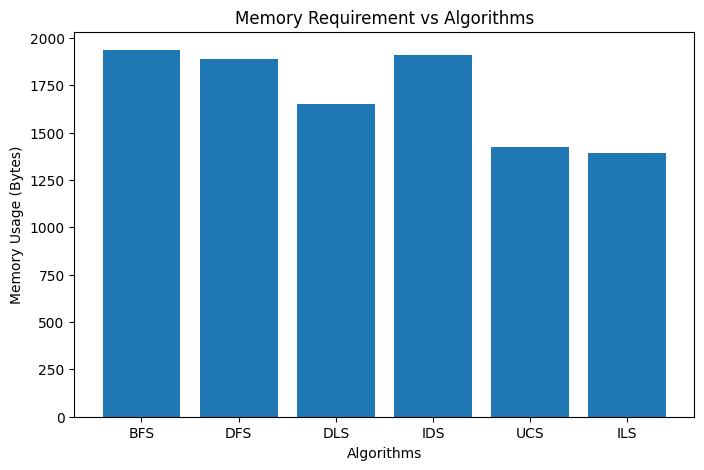

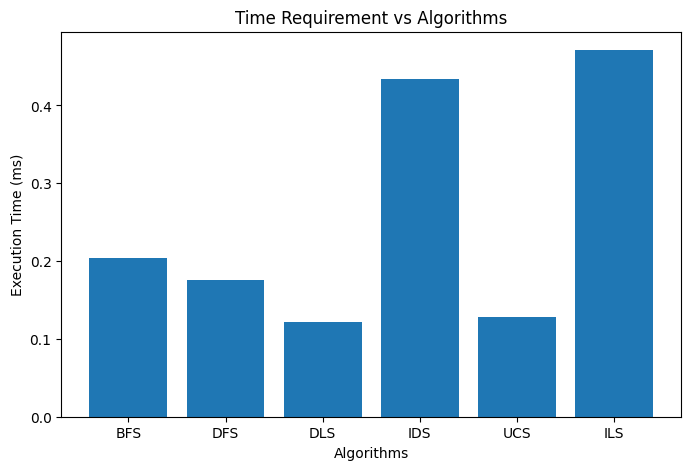

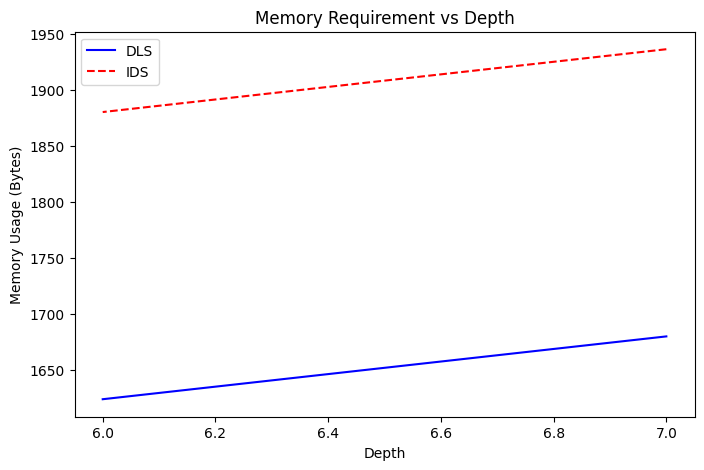

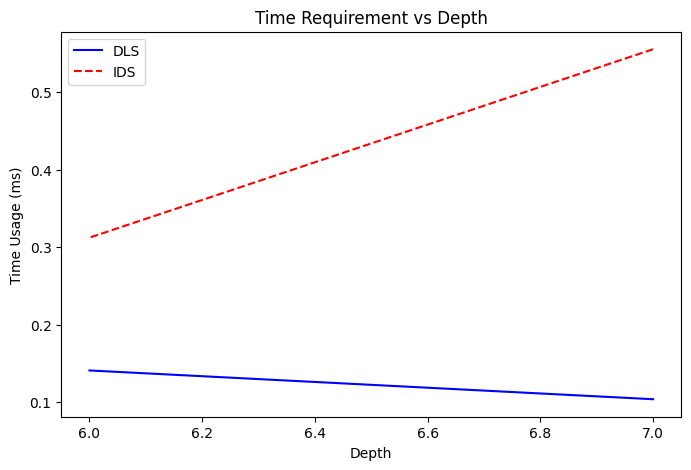


Summary of Time and Memory Usage:
AlgoID     Avg Time (s)    Avg Memory (MB) Runs      
-------------------------------------------------------
0          0.204091        1936.00         1         
1          0.175559        1888.00         1         
2          0.122355        1652.00         2         
3          0.433760        1908.00         2         
4          0.127950        1424.00         1         
5          0.471260        1392.00         1         
-------------------------------------------------------
Comparison of DLS vs IDS
AlgoID     Time (s)        Memory (MB)     Depth     
-------------------------------------------------------
2          0.103800        1680.00         7         
2          0.140910        1624.00         6         
3          0.555310        1936.00         7         
3          0.312210        1880.00         6         
-------------------------------------------------------


In [ ]:
run_from_file("input.txt","output.txt")